## Косарский Иван, ПМИ-3

## Понижение размерности

### Подготовка данных

#### Датасет прогнозирование оттока клиентов банка 

#### https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction?resource=download

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [136]:
df = pd.read_csv('Churn_Modelling.csv', sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [137]:
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


### Уберем ненужные признаки: номер строки, айди клиента, фамилия клиента, номер кредитного счета

In [138]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis=1)

### Кодируем категориальные признаки

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df

for column in ['Geography', 'Gender']:
    df_encoded[column] = le.fit_transform(df_encoded[column])

df_encoded.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


### Нормализация данных

In [194]:
df_scaled = df[['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_final = pd.DataFrame(df_scaled, columns=['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])
df_final['Geography'] = df_encoded['Geography']
df_final['Gender'] = df_encoded['Gender']
df_final['HasCrCard'] = df_encoded['HasCrCard']
df_final['IsActiveMember'] = df_encoded['IsActiveMember']
df_final['Exited'] = df_encoded['Exited']

df_final = df_final.dropna()
df_final.head()

X = df_final.drop(columns=['Exited'], axis=1)
y = df_final['Exited']
y = y.astype(int)

cols = X.columns

### Важность признаков

In [161]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
4,EstimatedSalary,0.305023
0,Age,0.216552
2,Balance,0.195845
1,Tenure,0.132333
3,NumOfProducts,0.039852
5,Geography,0.039081
7,HasCrCard,0.027600
8,IsActiveMember,0.026729
6,Gender,0.016984


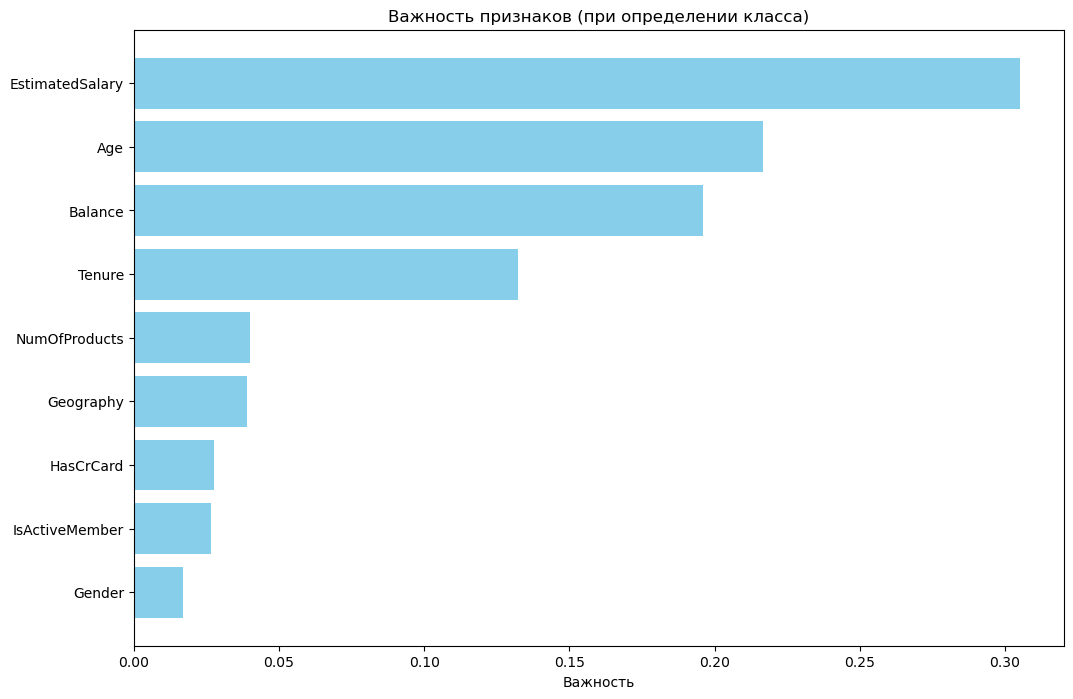

In [162]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.title('Важность признаков (при определении класса)')
plt.gca().invert_yaxis()  
plt.show()

### PCA

/var/folders/dx/jw53r48d1tx21ndwg6f4_0jc0000gn/T/ipykernel_8860/3587731656.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


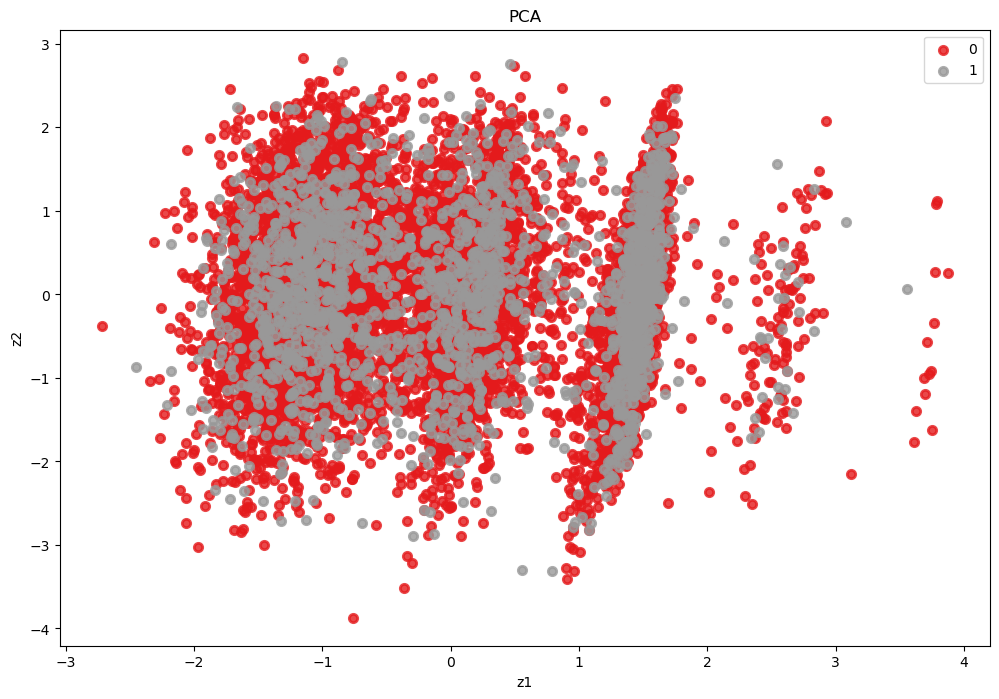

In [163]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

unique_classes = sorted(y.unique())
colors = plt.cm.get_cmap("Set1", len(unique_classes))  

plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA")
plt.show()

In [164]:
pca.explained_variance_ratio_

array([0.20517325, 0.15858235])

### ICA

/var/folders/dx/jw53r48d1tx21ndwg6f4_0jc0000gn/T/ipykernel_8860/521615420.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


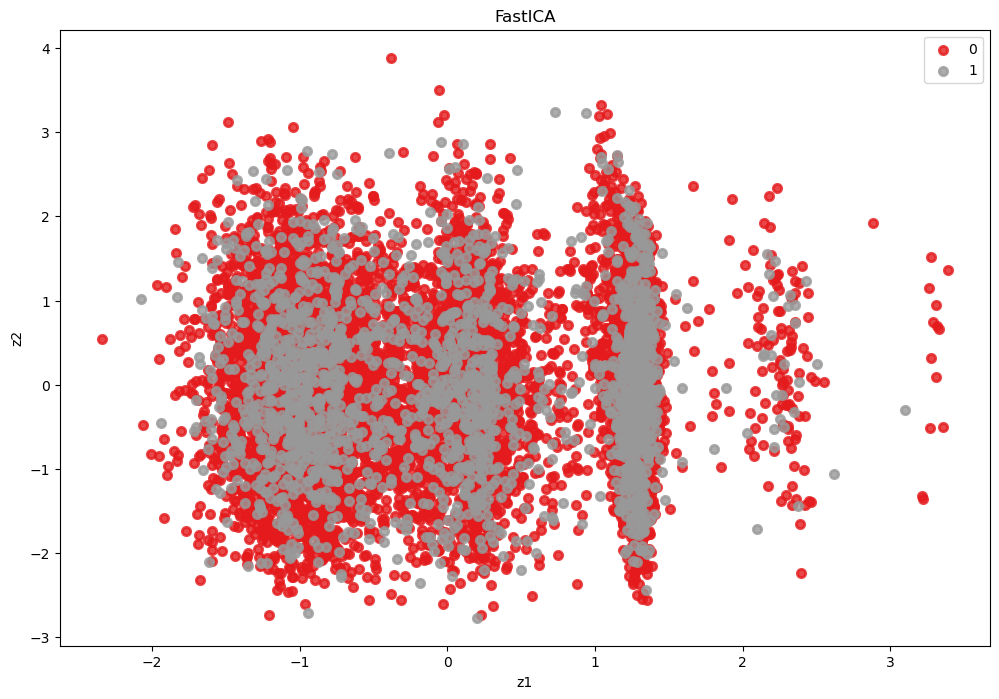

In [165]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

unique_classes = sorted(y.unique())
colors = plt.cm.get_cmap("Set1", len(unique_classes))

plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("FastICA")
plt.show()

### Kernel PCA

/var/folders/dx/jw53r48d1tx21ndwg6f4_0jc0000gn/T/ipykernel_8860/2586825231.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


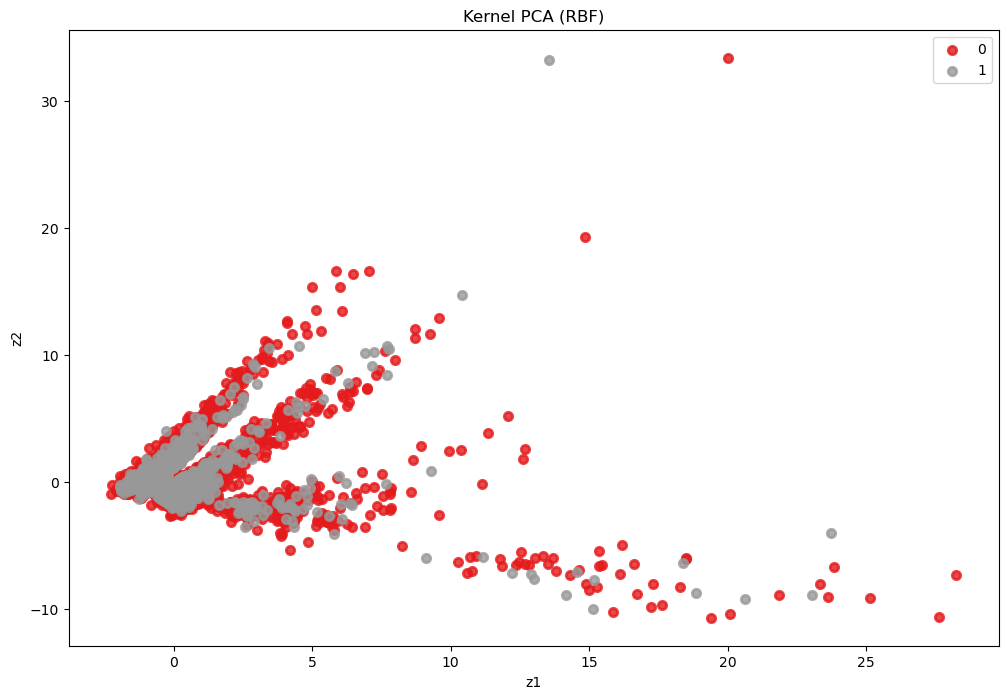

In [166]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='poly', degree=5)
X_new = rbf_pca.fit_transform(X)

unique_classes = sorted(y.unique())
colors = plt.cm.get_cmap("Set1", len(unique_classes))

# Визуализация
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Kernel PCA (RBF)")
plt.show()

### tSNE

Initial Shape of X:  (9994, 9)
New Shape of X:  (9994, 2)
Kullback-Leibler divergence after optimization:  1.670356035232544
No. of iterations:  999


/var/folders/dx/jw53r48d1tx21ndwg6f4_0jc0000gn/T/ipykernel_8860/2754161911.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


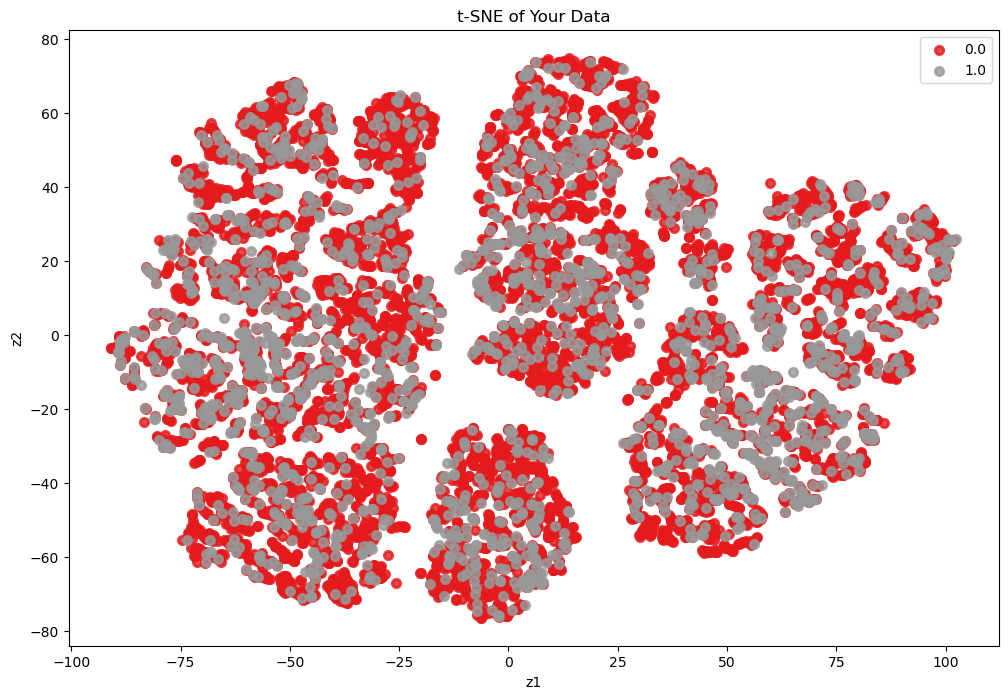

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

unique_classes = sorted(y.unique())
colors = plt.cm.get_cmap("Set1", len(unique_classes))

# Визуализация
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("t-SNE of Your Data")
plt.show()

### DBSCAN

#### Метод локтя

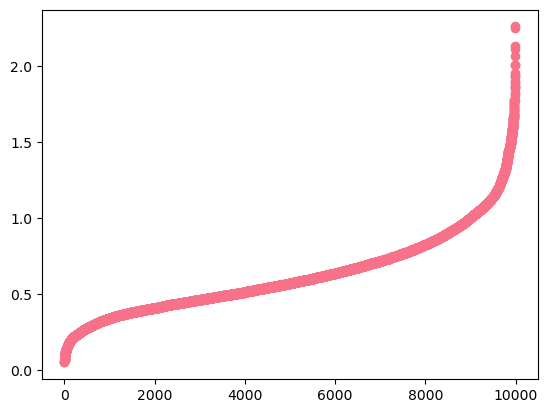

In [189]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

In [191]:
dbscan = DBSCAN(eps = 1.5, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=1.5, min_samples=3)


In [196]:
pred = dbscan.fit_predict(X)

Estimated number of clusters: 11
Estimated number of noise points: 101


/var/folders/dx/jw53r48d1tx21ndwg6f4_0jc0000gn/T/ipykernel_8860/3790278224.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_labels))


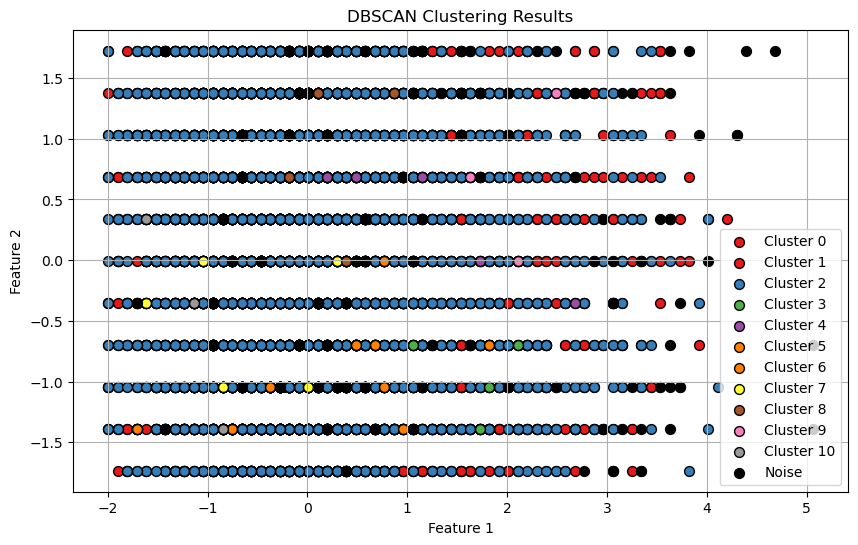

In [207]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Применение DBSCAN к исходным данным X
dbscan = DBSCAN(eps=1.5, min_samples=3)
labels = dbscan.fit_predict(X)

# Подсчет количества кластеров (исключая шум) и шумовых точек
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

# Визуализация результатов DBSCAN
unique_labels = set(labels)
colors = plt.cm.get_cmap("Set1", len(unique_labels))

plt.figure(figsize=(10, 6))
for k in unique_labels:
    col = 'k' if k == -1 else colors(k)  # Черный цвет для шума
    class_member_mask = (labels == k)

    # Визуализация точек для текущего кластера
    plt.scatter(X.loc[class_member_mask, X.columns[0]], X.loc[class_member_mask, X.columns[1]],
                color=col, edgecolor='k', s=50, label=f'Cluster {k}' if k != -1 else "Noise")

plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()